In [130]:
!pip install matplotlib pandas openpyxl
!conda install -y -c conda-forge pandas matplotlib xlrd openpyxl

Solving environment: done

## Package Plan ##

  environment location: /home/iwright/anaconda3/envs/env-01

  added / updated specs:
    - matplotlib
    - openpyxl
    - pandas
    - xlrd


The following NEW packages will be INSTALLED:

  cycler             conda-forge/noarch::cycler-0.10.0-py_2
  dbus               pkgs/main/linux-64::dbus-1.13.18-hb2f20db_0
  expat              pkgs/main/linux-64::expat-2.2.10-he6710b0_2
  fontconfig         conda-forge/linux-64::fontconfig-2.13.1-h86ecdb6_1001
  freetype           conda-forge/linux-64::freetype-2.10.4-h7ca028e_0
  gettext            conda-forge/linux-64::gettext-0.19.8.1-hf34092f_1004
  glib               conda-forge/linux-64::glib-2.58.3-py38h73cb85d_1004
  gst-plugins-base   conda-forge/linux-64::gst-plugins-base-1.14.5-h0935bb2_2
  gstreamer          conda-forge/linux-64::gstreamer-1.14.5-h36ae1b5_2
  icu                conda-forge/linux-64::icu-64.2-he1b5a44_1
  jpeg               conda-forge/linux-64::jpeg-9d-h36c2ea0_0
  kiwi

In [131]:
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



In [132]:
raw_data = pd.read_excel(os.path.join('water','waterreadings.xlsx'), index_col=[0], engine='openpyxl', sheet_name=None)



In [133]:
all_data = pd.concat(raw_data)

In [134]:
all_data.index.names = (['date', 'Location'])
all_data.index.names 

FrozenList(['date', 'Location'])

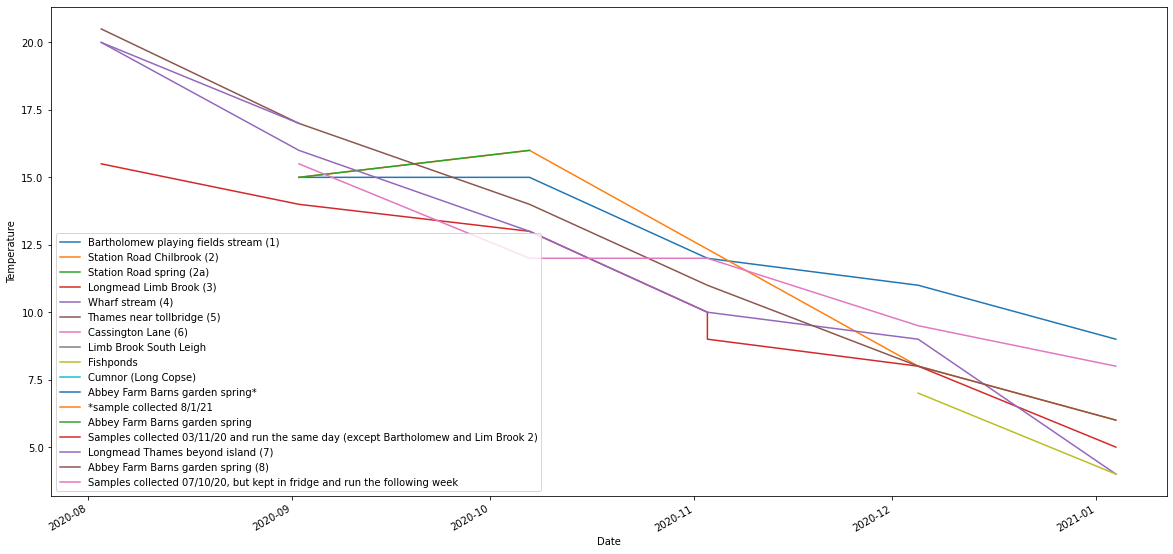

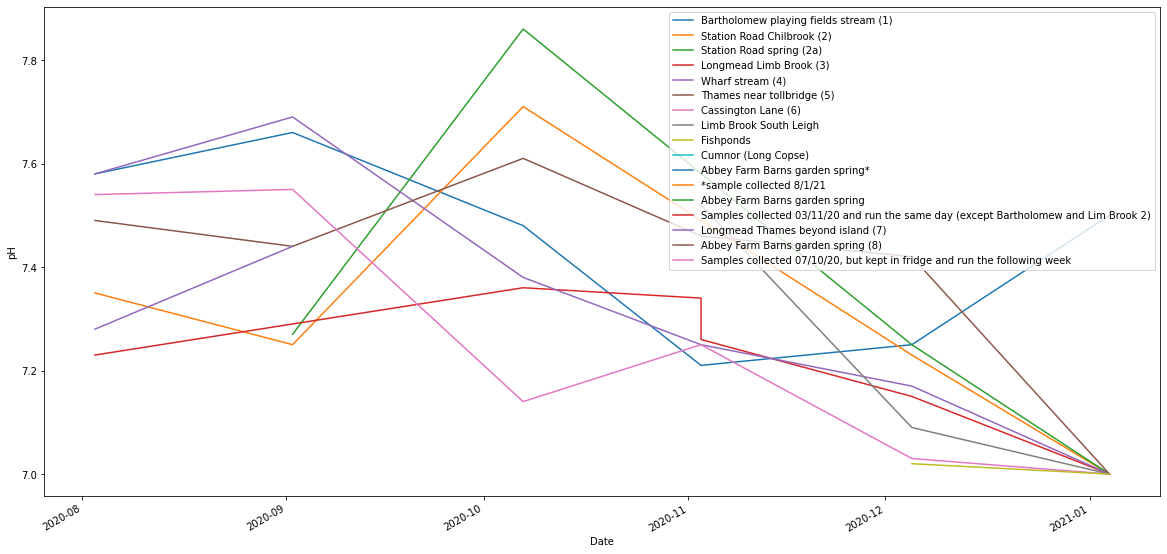

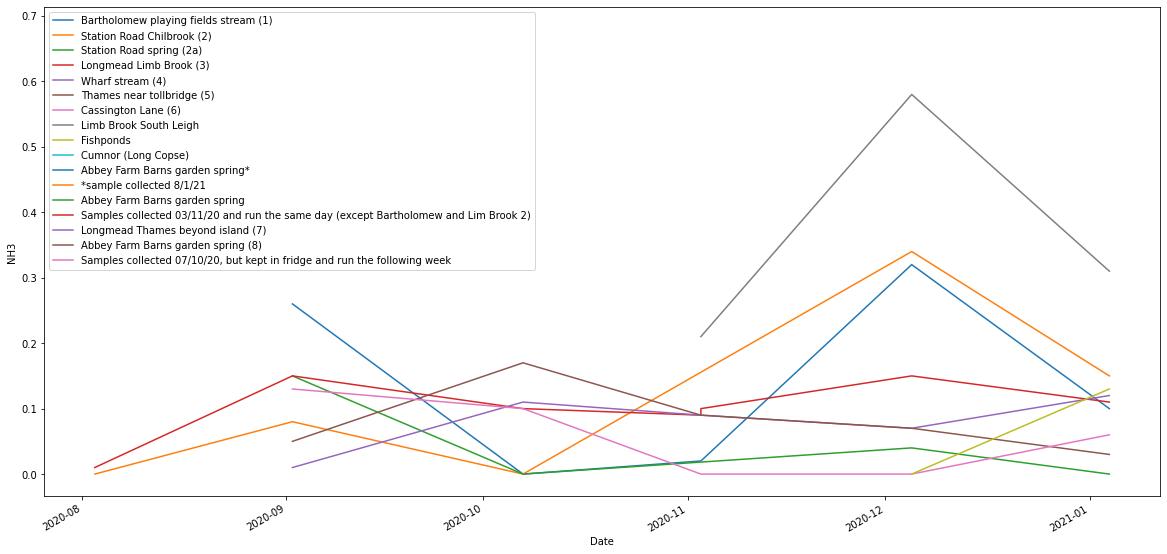

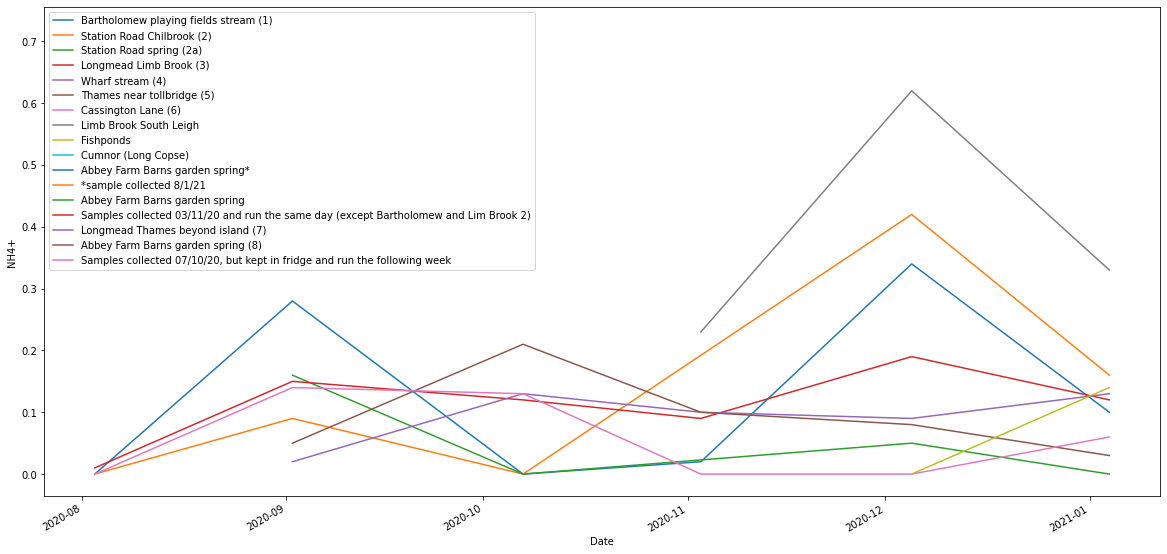

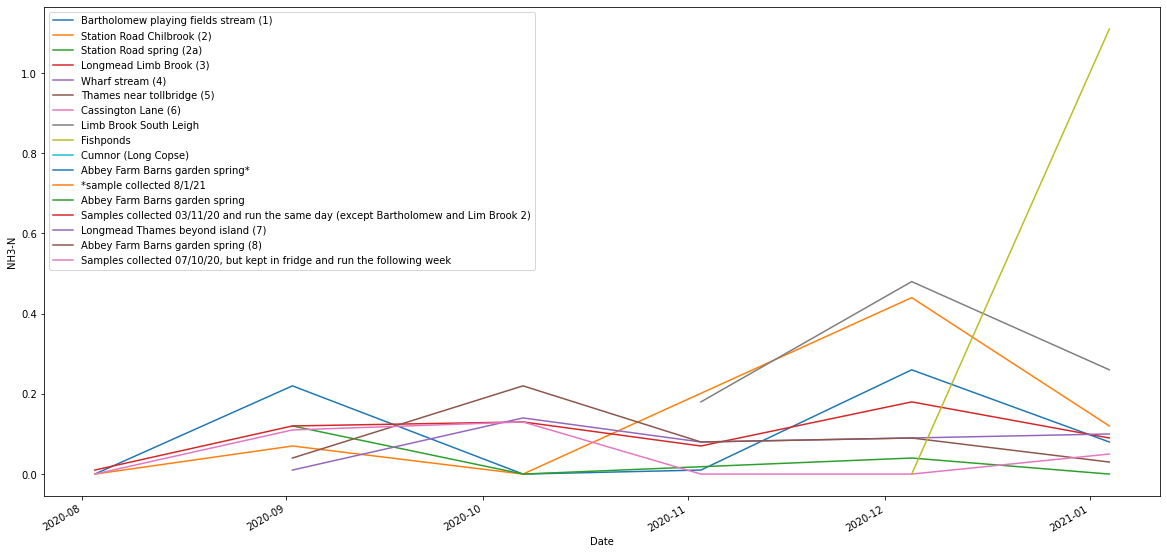

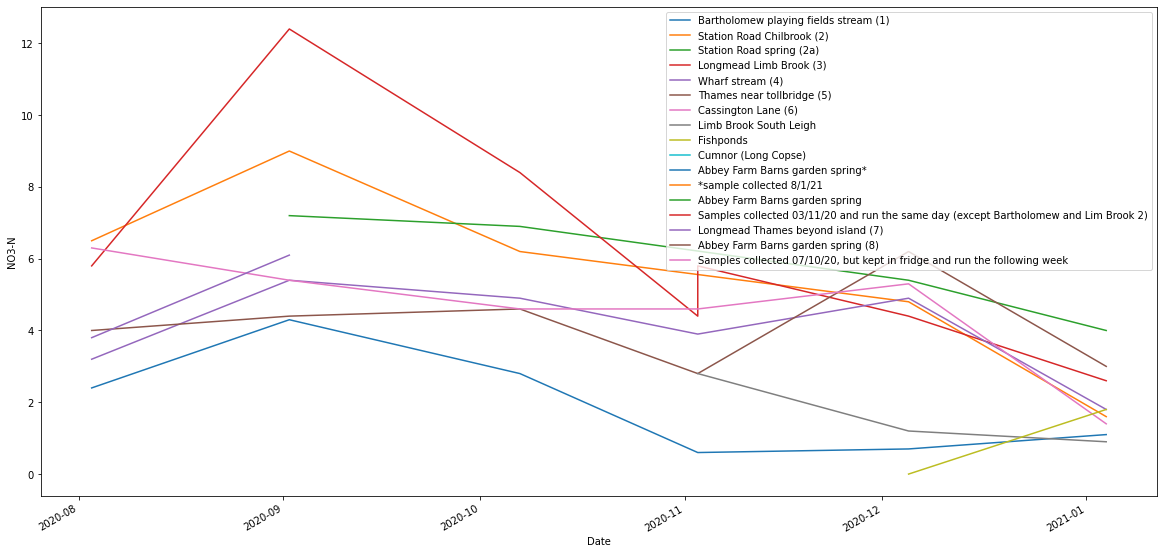

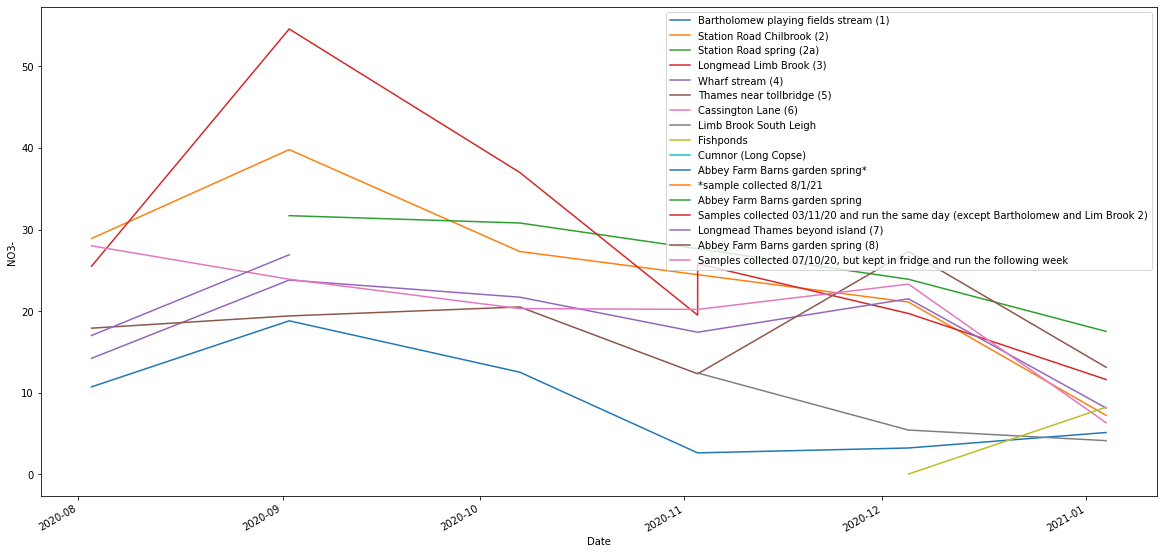

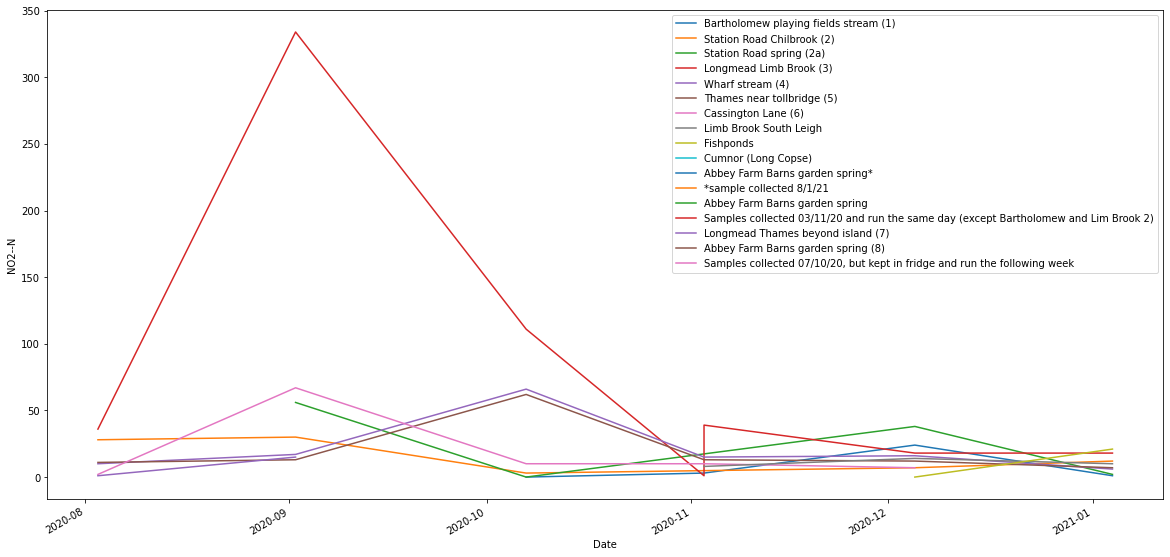

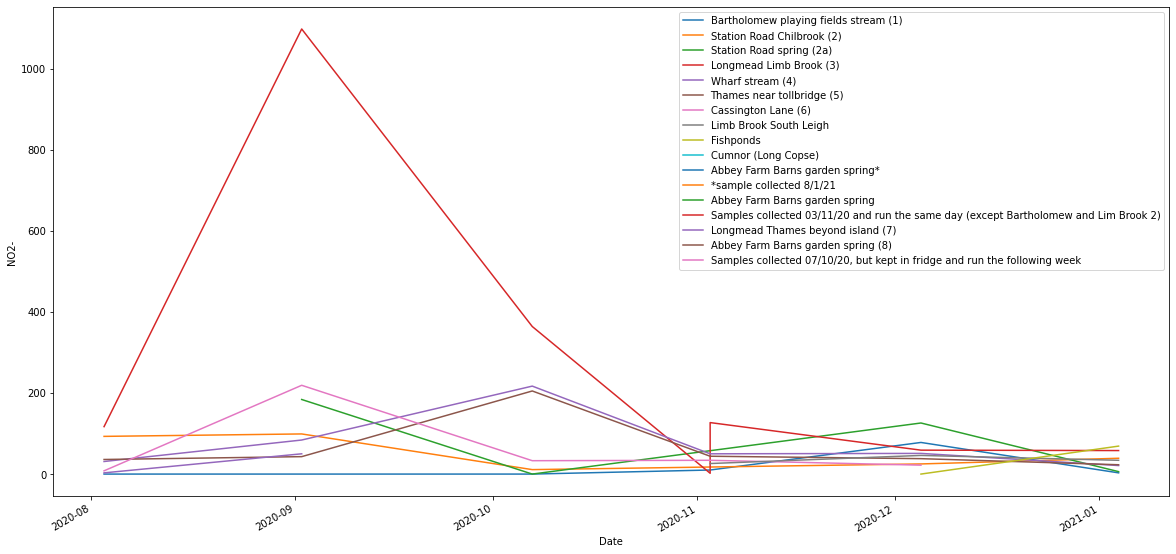

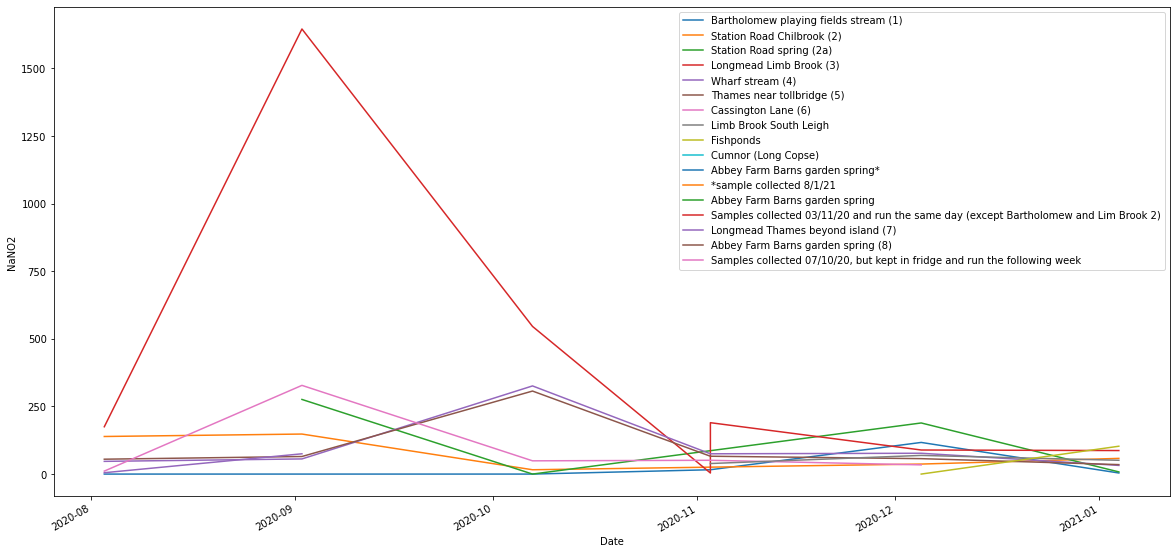

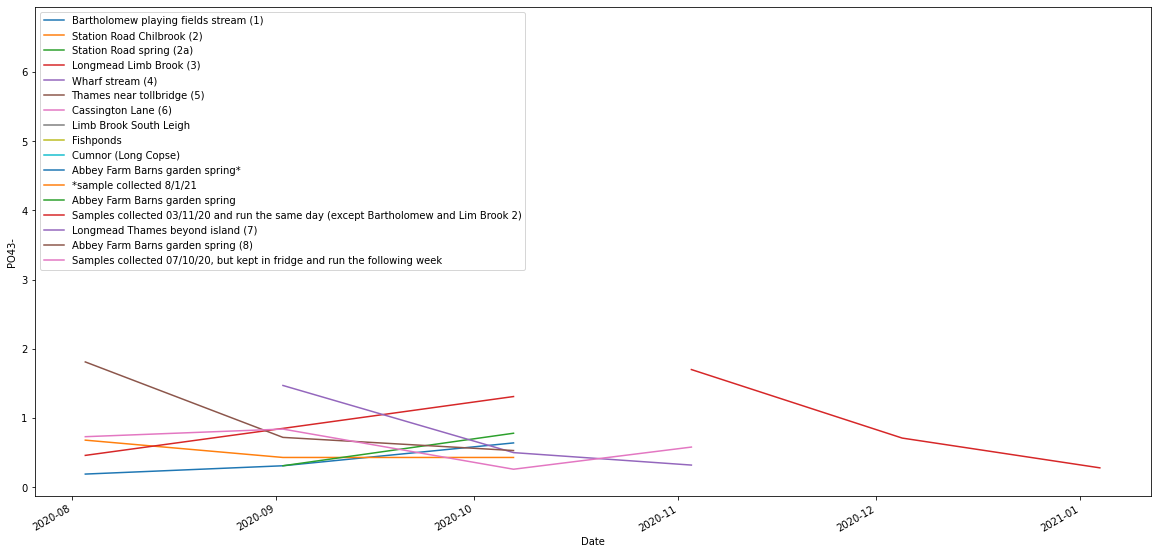

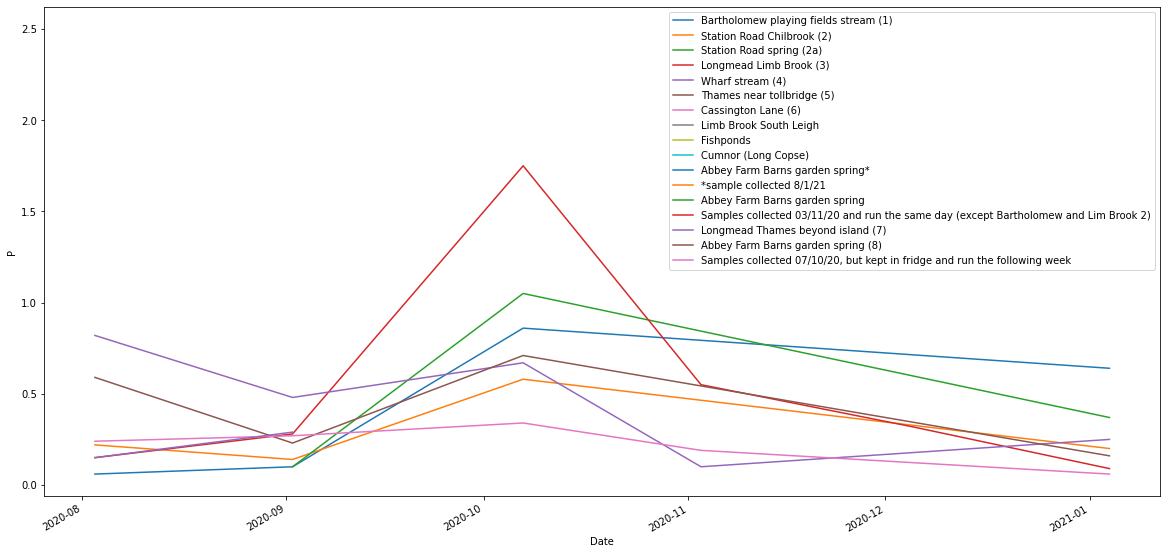

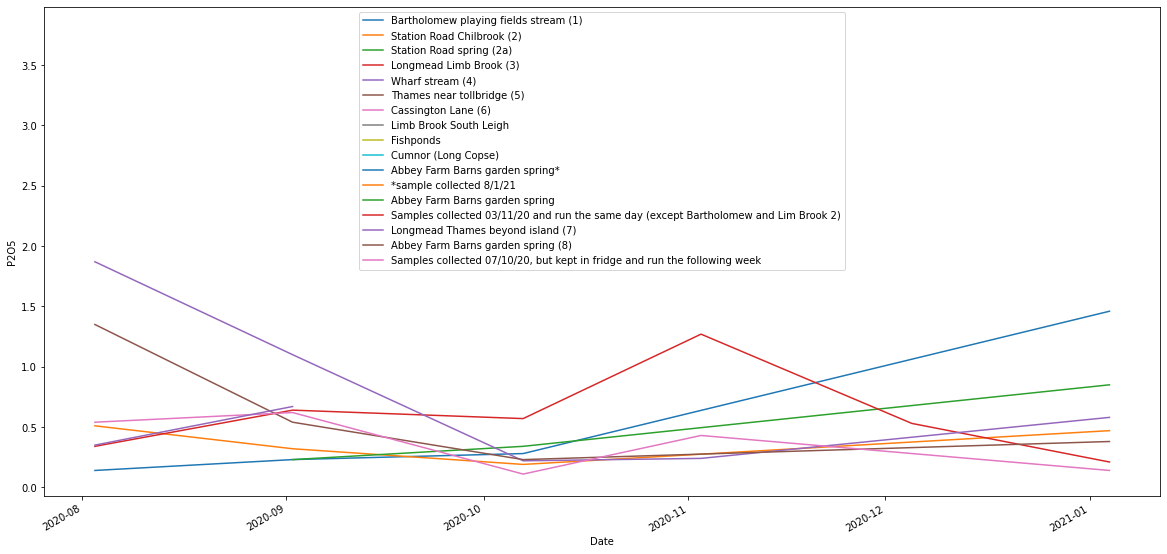

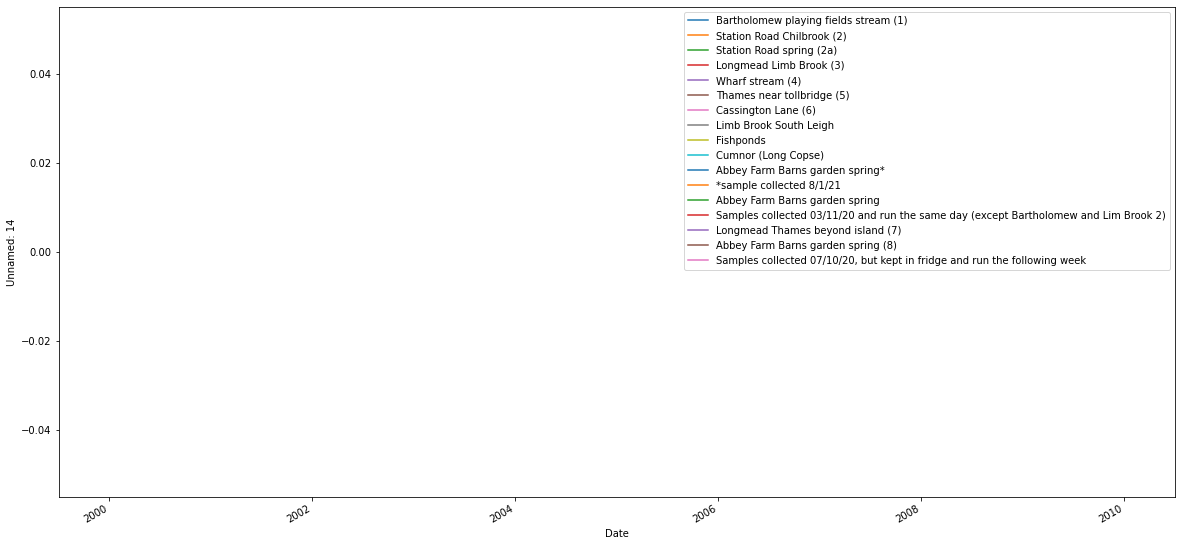

In [135]:
site = 'Station Road Chilbrook (2)'
fig = 0
for column in all_data.columns:
    #print(column)
    for site in all_data.index.get_level_values('Location').unique():
        values = all_data.loc[(slice(None), site), :][column].dropna().to_frame()
    #print(values)
        values.reset_index(inplace=True)
    #values.info()
    #values.set_index('date', inplace=True)
        values['date'] = pd.to_datetime(values['date'], format='%d-%m-%Y', errors='coerce')
        values.set_index('date', inplace=True)
        plt.figure(fig)
    #print(values[column])
        values[column] = pd.to_numeric(values[column], errors='coerce')
    # values = values[values[column].apply(lambda x: x.isnumeric())]

        values[column].plot(figsize=(20,10), label=site)
        plt.xlabel('Date')
        plt.ylabel(column)
    plt.legend()
    fig += 1

